In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datasist as ds
import plotly.express as px
import cufflinks as cf

from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, fbeta_score

sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3)

In [2]:
data_1 = pd.read_csv('test.csv')
data_2 = pd.read_csv('train.csv')

In [3]:
data = pd.concat([data_1,data_2])
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
ds.structdata.describe(data)

First five data points


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied




Random five data points


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
22307,22307,117448,Female,Loyal Customer,36,Business travel,Eco,1020,2,2,...,2,3,4,3,2,4,2,12,0.0,neutral or dissatisfied
15141,15141,49231,Male,Loyal Customer,36,Business travel,Business,2410,1,1,...,4,4,4,3,3,4,5,36,31.0,satisfied
12512,12512,35985,Female,Loyal Customer,43,Business travel,Business,2496,2,2,...,1,1,3,3,5,2,5,5,1.0,satisfied
62180,62180,89905,Female,disloyal Customer,27,Business travel,Business,1310,3,3,...,4,4,5,5,5,5,4,0,0.0,neutral or dissatisfied
58458,58458,87758,Female,Loyal Customer,35,Business travel,Business,214,3,3,...,4,4,4,5,3,4,5,0,0.0,satisfied




Last five data points


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied




Shape of  data set: (129880, 25)


Size of  data set: 3247000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Unnamed: 0,int64
id,int64
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64




Numerical Features in Data set
['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Categorical Features in Data set


['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']



Statistical Description of Columns


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000




Description of Categorical Features


,count,unique,top,freq
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452




Unique class Count of Categorical features


,Feature,Unique Count
0,Gender,2
1,Customer Type,2
2,Type of Travel,2
3,Class,3
4,satisfaction,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Unnamed: 0,0,0.0
1,id,0,0.0
2,Gender,0,0.0
3,Customer Type,0,0.0
4,Age,0,0.0
5,Type of Travel,0,0.0
6,Class,0,0.0
7,Flight Distance,0,0.0
8,Inflight wifi service,0,0.0
9,Departure/Arrival time convenient,0,0.0


In [5]:
data.duplicated().sum()

0

In [6]:
data.drop(ds.structdata.detect_outliers(data, 0 , ["Flight Distance"]), axis=0, inplace=True)

In [7]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
cat_list = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [9]:
for cat in cat_list :
    print(cat)
    print('---------')
    for val in data[cat].unique():
        print(f'  - {val}')
    print('-'*80)
    for val in data[cat].value_counts():
        print(f'  - {val}')
    print('-'*80)

Gender
---------
  - Female
  - Male
--------------------------------------------------------------------------------
  - 63873
  - 62026
--------------------------------------------------------------------------------
Customer Type
---------
  - Loyal Customer
  - disloyal Customer
--------------------------------------------------------------------------------
  - 102351
  - 23548
--------------------------------------------------------------------------------
Type of Travel
---------
  - Business travel
  - Personal Travel
--------------------------------------------------------------------------------
  - 86095
  - 39804
--------------------------------------------------------------------------------
Class
---------
  - Eco
  - Business
  - Eco Plus
--------------------------------------------------------------------------------
  - 58800
  - 57776
  - 9323
--------------------------------------------------------------------------------
satisfaction
---------
  - satisfied
  - neut

In [10]:
num_list =['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [11]:
for cat in num_list :
    print(cat)
    print('---------')
    for val in data[cat].unique():
        print(f'  - {val}')
    print('-'*80)
    for val in data[cat].value_counts():
        print(f'  - {val}')
    print('-'*80)

Inflight wifi service
---------
  - 5
  - 1
  - 2
  - 0
  - 3
  - 4
--------------------------------------------------------------------------------
  - 31439
  - 31304
  - 24000
  - 21598
  - 13806
  - 3752
--------------------------------------------------------------------------------
Departure/Arrival time convenient
---------
  - 4
  - 1
  - 0
  - 3
  - 2
  - 5
--------------------------------------------------------------------------------
  - 31050
  - 27188
  - 21645
  - 20797
  - 18692
  - 6527
--------------------------------------------------------------------------------
Ease of Online booking
---------
  - 3
  - 2
  - 0
  - 4
  - 1
  - 5
--------------------------------------------------------------------------------
  - 29598
  - 29239
  - 23638
  - 21193
  - 16730
  - 5501
--------------------------------------------------------------------------------
Gate location
---------
  - 4
  - 1
  - 2
  - 3
  - 5
  - 0
------------------------------------------------------------

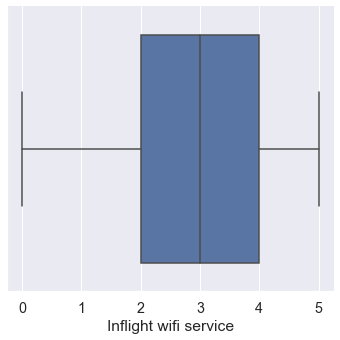

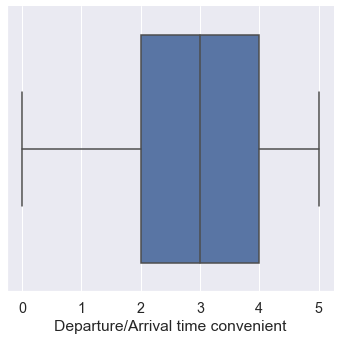

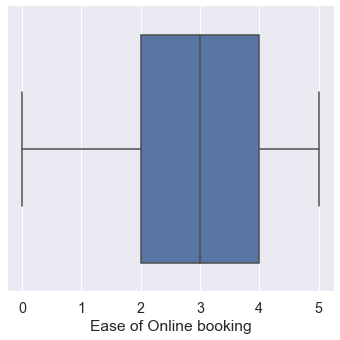

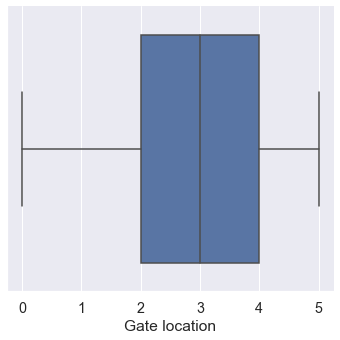

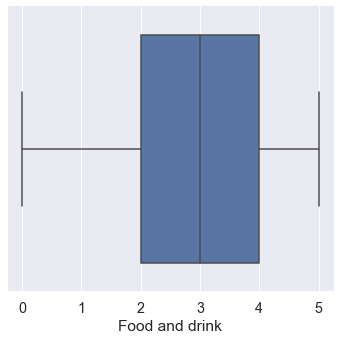

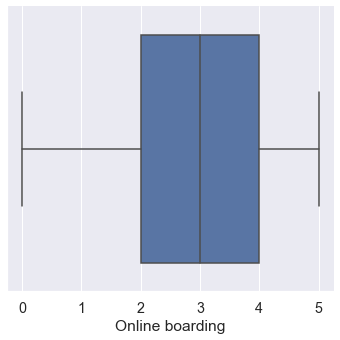

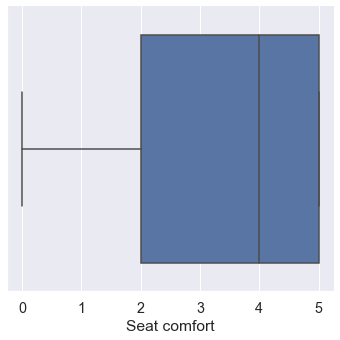

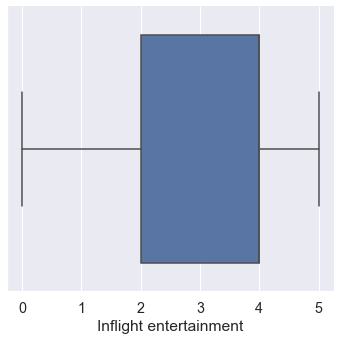

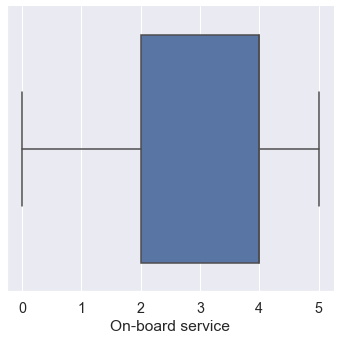

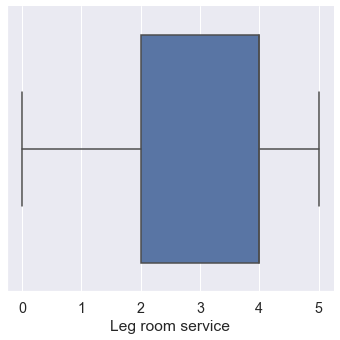

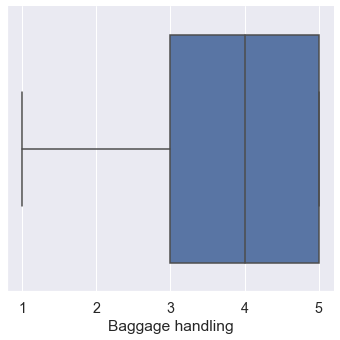

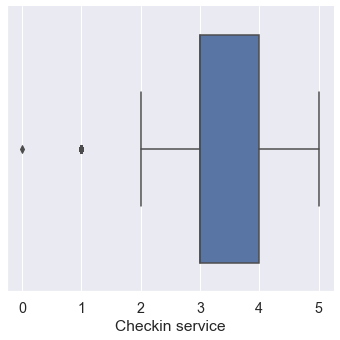

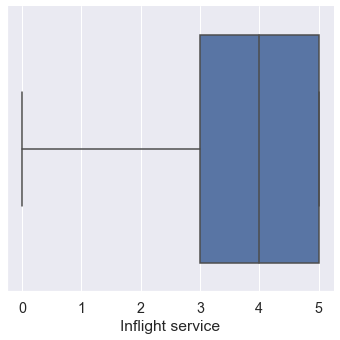

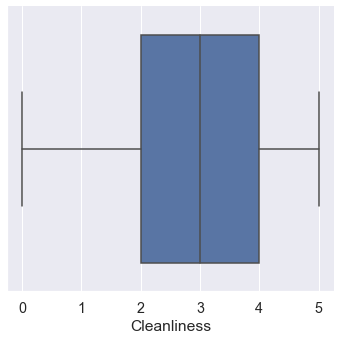

In [12]:
for i in num_list:
    sns.catplot(data=data,x=i,kind='box')

<AxesSubplot:>

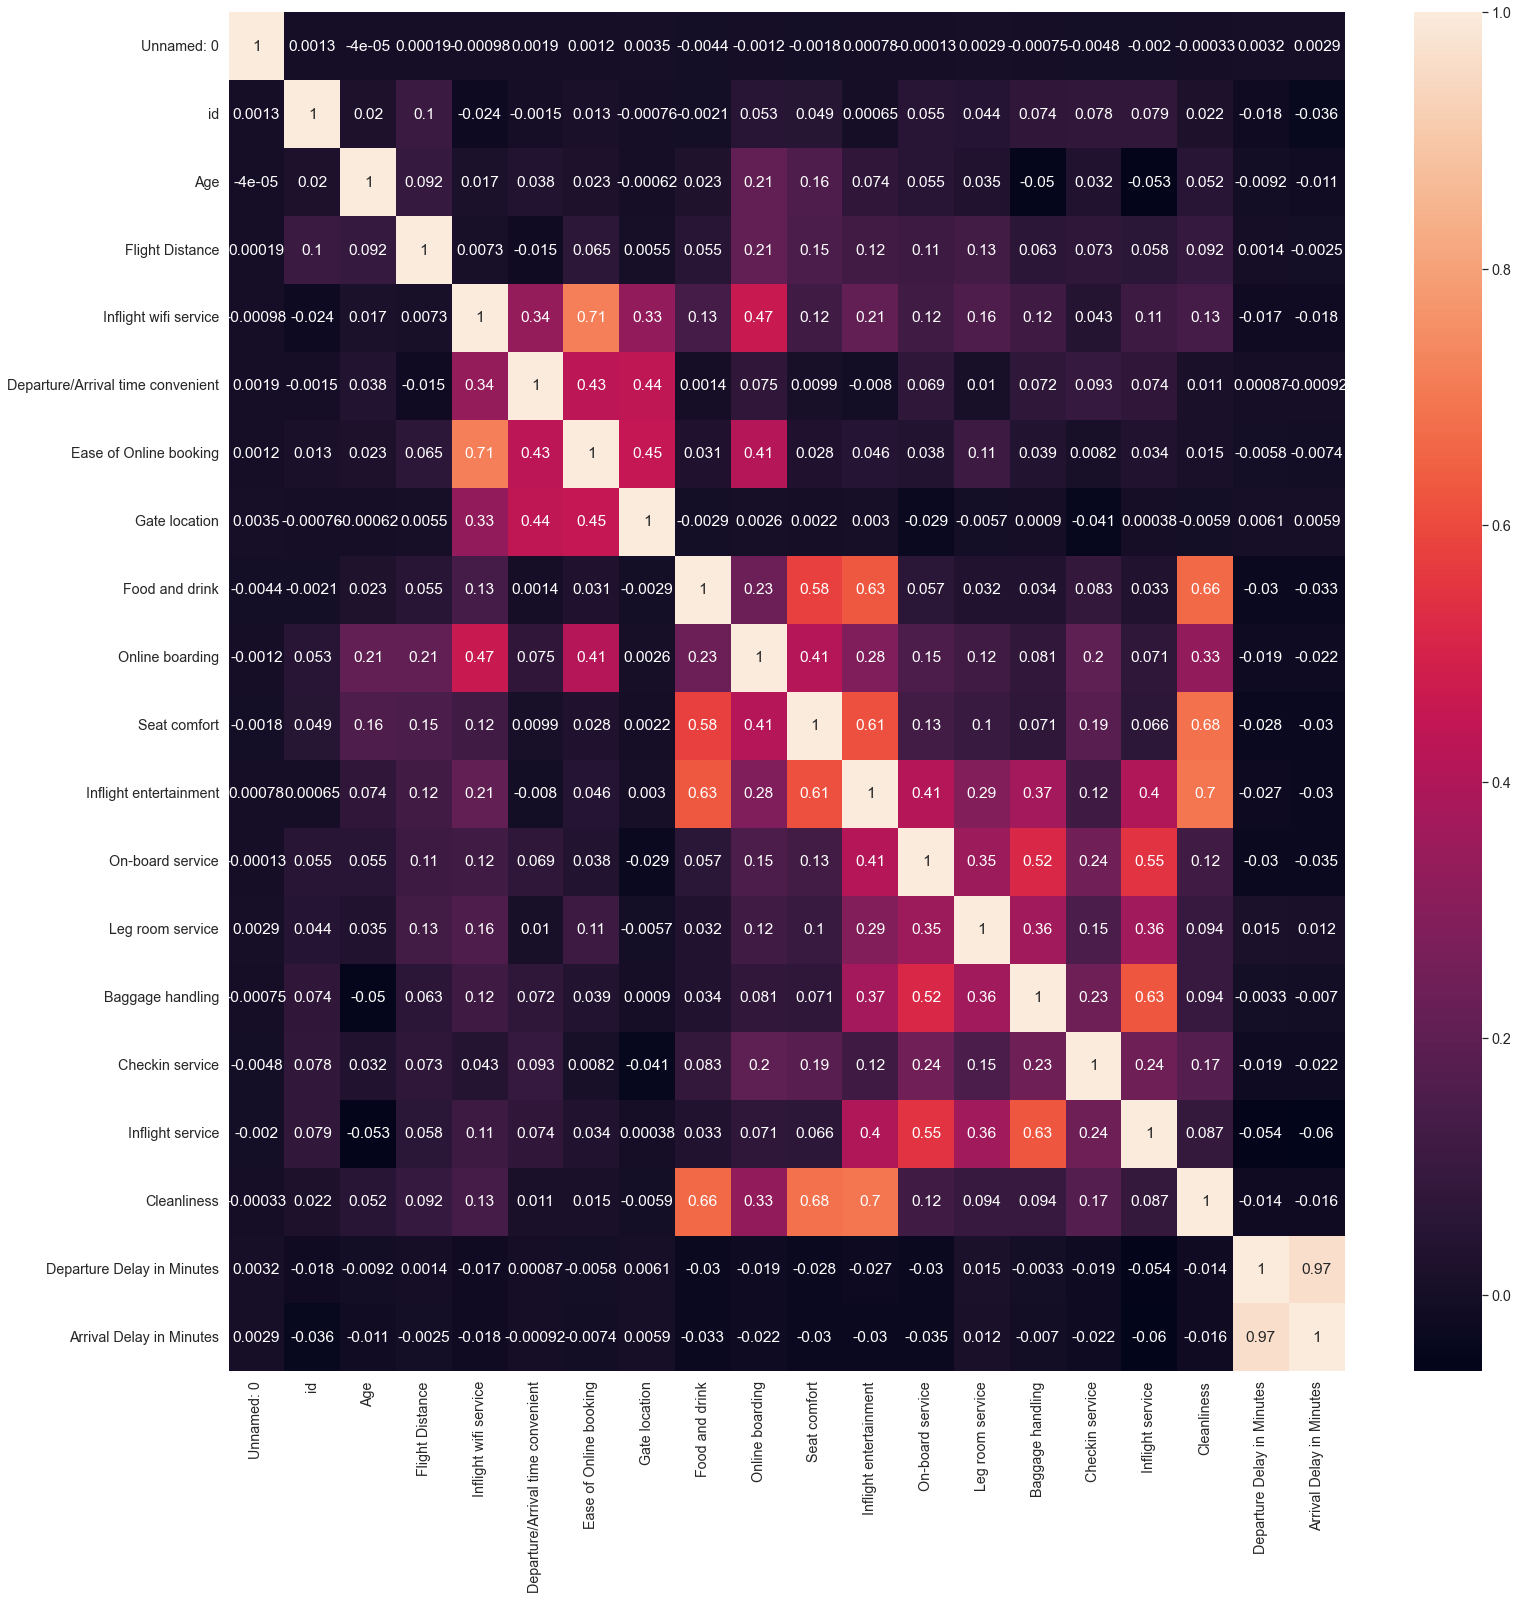

In [13]:
sns.set(rc={'figure.figsize': [25, 25]}, font_scale=1.3)
sns.heatmap(data.corr(), annot=True)

In [14]:
size_dict = {'Eco':1, 
        'Business':2, 
        'Eco Plus':3, }

# apply using map
data['Class'] = data['Class'].map(size_dict)

In [15]:
size_dict = {'Loyal Customer':1, 
        'disloyal Customer':2, 
        }

# apply using map
data['Customer Type'] = data['Customer Type'].map(size_dict)

In [16]:
data = pd.get_dummies(data, columns=['Gender', 'Type of Travel','satisfaction'], drop_first=True)

In [17]:
x = data.drop(['Unnamed: 0','id','Age','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction_satisfied'], axis=1)
y = data['satisfaction_satisfied']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,shuffle=True)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, confusion_matrix , plot_confusion_matrix



models = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier(),
    
}
#'SVM': SVC()

for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Confusion Matrix\n{confusion_matrix(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'Precession: {precision_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')
    print(f'FBeta_0.5: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print(f'FBeta_2: {fbeta_score(y_test, y_pred, beta=2)}')
    print('-'*80)

Model: LR
Confusion Matrix
[[12656  1782]
 [ 2073  8669]]
Accuracy: 0.8469023034154091
Recall: 0.8070191770619997
Precession: 0.8294900009568462
F1: 0.8181003161421224
FBeta_0.5: 0.8248962813534808
FBeta_2: 0.8114154139912765
--------------------------------------------------------------------------------
Model: KNN
Confusion Matrix
[[12454  1984]
 [ 2850  7892]]
Accuracy: 0.808022239872915
Recall: 0.7346862781604915
Precession: 0.7991089509923046
F1: 0.765544669706082
FBeta_0.5: 0.7853361461608884
FBeta_2: 0.7467262130043146
--------------------------------------------------------------------------------
Model: DT
Confusion Matrix
[[13636   802]
 [  680 10062]]
Accuracy: 0.9411437648927721
Recall: 0.936697076894433
Precession: 0.926178203240059
F1: 0.9314079422382672
FBeta_0.5: 0.9282630355363666
FBeta_2: 0.9345742309407044
--------------------------------------------------------------------------------
Model: RF
Confusion Matrix
[[14158   280]
 [  665 10077]]
Accuracy: 0.962470214455

In [ ]:
kernels = ['linear']

for kernel in kernels:

    print(f"the kernel is {kernel}")

    model = SVC(kernel=kernel)
    print(f"the model name is : {kernel}\n" + "_"*30)
    model.fit(x_train, y_train)

    y_train_predict = model.predict(X_train)   
    y_test_predict = model.predict(X_test)

    print(f"\n the Train Accuracy is {accuracy_score(y_train, y_train_predict)}")
    print(f"the Test Accuracy is {accuracy_score(y_test, y_test_predict)} \n")

    print("_"*30)

    print(f"the Train Accuracy is \n{classification_report(y_train, y_train_predict)}\n")
    print(f"the Test Accuracy is \n{classification_report(y_test, y_test_predict)} \n")



    print("\n" + "-"*100 + "\n\n")
 

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
 